Thera Bank Personal Loan Campaign Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Domain:
Banking

Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

Attribute Information:
 ID: Customer ID - ignore
 Age: Customer's age in completed years - num
 Experience: #years of professional experience - num
 Income: Annual income of the customer ($000) - num
 ZIP Code: Home Address ZIP code. - ignore
 Family: Family size of the customer - num
 CCAvg: Avg. spending on credit cards per month ($000) - num
 Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional - cat
 Mortgage: Value of house mortgage if any. ($000) - num
 Personal Loan: Did this customer accept the personal loan offered in the last campaign? - cat
 Securities Account: Does the customer have a securities account with the bank? - cat
 CD Account: Does the customer have a certificate of deposit (CD) account with the bank? - cat
 Online: Does the customer use internet banking facilities? - cat
 Credit card: Does the customer use a credit card issued by the bank? - cat

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

In [2]:
import warnings
warnings.filterwarnings('ignore')

1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import os,sys
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import metrics

In [4]:
#Loading Data
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
#Replace Education codes with actual names
df['Education'] = df['Education'].replace({1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'})
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Undergrad,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,Undergrad,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,Undergrad,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,Graduate,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,Graduate,0,0,0,0,0,1


In [6]:
#Shape
df.shape

(5000, 14)

In [7]:
#For dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   object 
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


In [8]:
#Converting int to category dtype
df['Personal Loan'] = df['Personal Loan'].astype('category')
df['Securities Account'] = df['Securities Account'].astype('category')
df['CD Account'] = df['CD Account'].astype('category')
df['Online'] = df['Online'].astype('category')
df['CreditCard'] = df['CreditCard'].astype('category')

In [9]:
#Re-checking dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   object  
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   category
 10  Securities Account  5000 non-null   category
 11  CD Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(5), float64(1), int64(7), object(1)
memory usage: 376.6+ KB


In [10]:
# dropping this column as it will be 1-1 mapping anyways
df = df.drop('ID', axis =1) 
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,Undergrad,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,Undergrad,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,Graduate,0,0,0,0,0,1


In [11]:
#Dropping column zip 
df= df.drop('ZIP Code', axis =1)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,Undergrad,0,0,1,0,0,0
1,45,19,34,3,1.5,Undergrad,0,0,1,0,0,0
2,39,15,11,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9,100,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,4,1.0,Graduate,0,0,0,0,0,1


In [12]:
#Null Values
df.isnull().values.any() 

False

In [13]:
#Summary
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,5000,NaN,NaN,NaN,45.3384,11.4632,23,35,45,55,67
Experience,5000,NaN,NaN,NaN,20.1046,11.468,-3,10,20,30,43
Income,5000,NaN,NaN,NaN,73.7742,46.0337,8,39,64,98,224
Family,5000,NaN,NaN,NaN,2.3964,1.14766,1,1,2,3,4
CCAvg,5000,NaN,NaN,NaN,1.93794,1.74766,0,0.7,1.5,2.5,10
Education,5000,3,Undergrad,2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mortgage,5000,NaN,NaN,NaN,56.4988,101.714,0,0,0,101,635
Personal Loan,5000,2,0,4520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Securities Account,5000,2,0,4478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CD Account,5000,2,0,4698,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Checking incorrect imputations
df[df.Experience < 0].head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,Advanced/Professional,0,0,0,0,0,1
226,24,-1,39,2,1.70,Graduate,0,0,0,0,0,0
315,24,-2,51,3,0.30,Advanced/Professional,0,0,0,0,1,0
451,28,-2,48,2,1.75,Advanced/Professional,89,0,0,0,1,0
524,24,-1,75,4,0.20,Undergrad,0,0,0,0,1,0


In [15]:
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

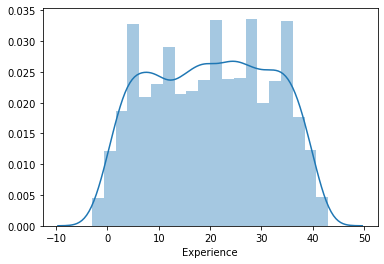

In [16]:
sns.distplot(df['Experience']);

In [17]:
#Imputing correct values
from sklearn.impute import SimpleImputer
negnum = [-1,-2,-3]
for i in negnum:
    rep_0 = SimpleImputer(missing_values = i, strategy="median")
    cols=['Experience']
    imputer = rep_0.fit(df[cols])
    df[cols] = imputer.transform(df[cols])
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,4,1.6,Undergrad,0,0,1,0,0,0
1,45,19.0,34,3,1.5,Undergrad,0,0,1,0,0,0
2,39,15.0,11,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9.0,100,1,2.7,Graduate,0,0,0,0,0,0
4,35,8.0,45,4,1.0,Graduate,0,0,0,0,0,1


In [18]:
#Re-checking
df['Experience'].unique()
df.Experience.median()

array([ 1., 19., 15.,  9.,  8., 13., 27., 24., 10., 39.,  5., 23., 32.,
       41., 30., 14., 18., 21., 28., 31., 11., 16., 20., 35.,  6., 25.,
        7., 12., 26., 37., 17.,  2., 36., 29.,  3., 22., 34.,  0., 38.,
       40., 33.,  4., 42., 43.])

20.0

2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
 Number of unique in each column?
 Number of people with zero mortgage?
 Number of people with zero credit card spending per month?
 Value counts of all categorical columns.
 Univariate and Bivariate
 Get data model ready

In [19]:
#Number of unique in each column?
df.nunique()

Age                    45
Experience             44
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [20]:
#Number of people with zero mortgage?
(df.Mortgage[df.Mortgage == 0]).value_counts()

0    3462
Name: Mortgage, dtype: int64

70% of the people do not have any house mortage taken from the bank.

In [21]:
df.Mortgage.value_counts(normalize = True)

0      0.6924
98     0.0034
103    0.0032
119    0.0032
83     0.0032
        ...  
541    0.0002
509    0.0002
505    0.0002
485    0.0002
577    0.0002
Name: Mortgage, Length: 347, dtype: float64

In [22]:
#Number of people with zero credit card spending per month?
(df.CCAvg[df.CCAvg == 0]).value_counts()

0.0    106
Name: CCAvg, dtype: int64

In [23]:
perc=106/5000
perc

0.0212

Almost entire population (~98%) of dataset have atleast some credit card spending with banks.

In [24]:
#Value counts of all categorical columns.
for i in list(df.columns[df.dtypes=='category']):   # checking value counts of all object type columns
    print(df[i].value_counts(normalize = False))
    print()

0    4520
1     480
Name: Personal Loan, dtype: int64

0    4478
1     522
Name: Securities Account, dtype: int64

0    4698
1     302
Name: CD Account, dtype: int64

1    2984
0    2016
Name: Online, dtype: int64

0    3530
1    1470
Name: CreditCard, dtype: int64



In [25]:
#Value counts of all categorical columns.
for i in list(df.columns[df.dtypes=='category']):   # checking value counts of all object type columns
    print(df[i].value_counts(normalize = True))
    print()

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

1    0.5968
0    0.4032
Name: Online, dtype: float64

0    0.706
1    0.294
Name: CreditCard, dtype: float64



In [26]:
df.Education.value_counts()

Undergrad                2096
Advanced/Professional    1501
Graduate                 1403
Name: Education, dtype: int64

In [27]:
df.Family.value_counts(normalize = True).sort_index()

1    0.2944
2    0.2592
3    0.2020
4    0.2444
Name: Family, dtype: float64

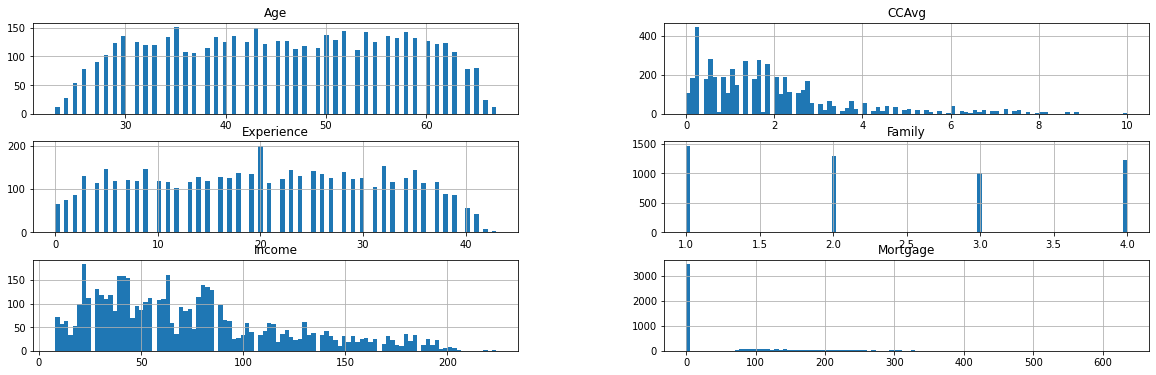

In [28]:
#Uni-variate Analysis
columns = list(df)[0:7] # Excluding Outcome column which has only 
df[columns].hist(stacked=True, bins=100, figsize=(20,30), layout=(14,2)); 
# Histogram of first 6 columns

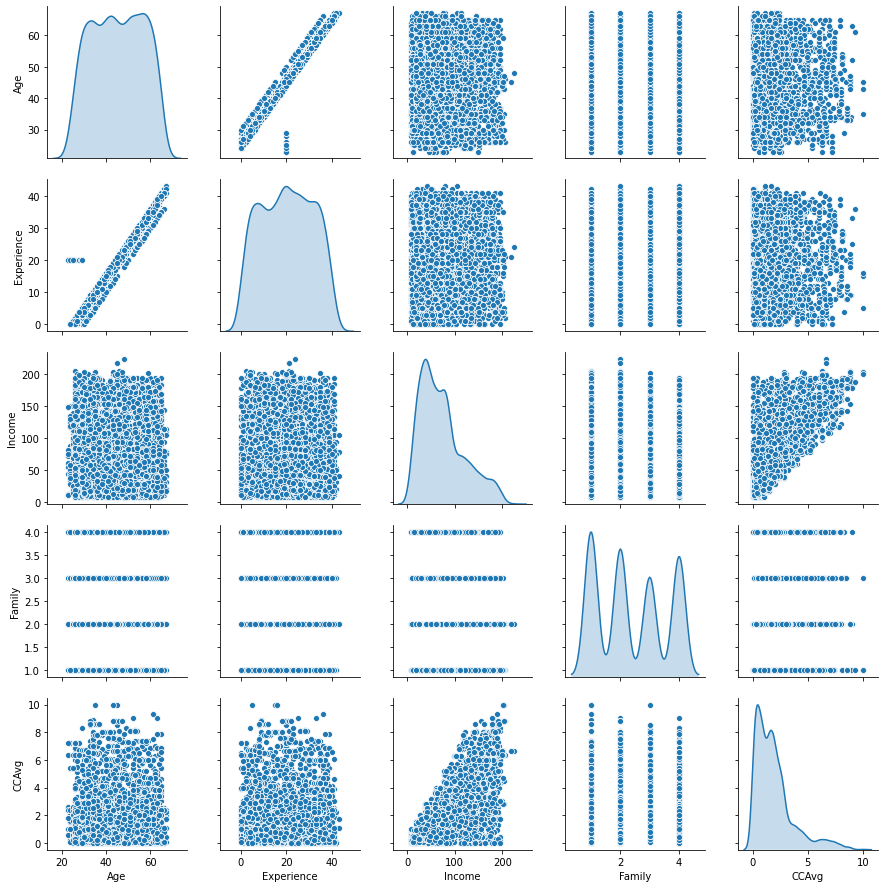

In [29]:
#Bi-Variate
df_attr = df.iloc[:, 0:6]
sns.pairplot(df_attr, diag_kind='kde')

In [30]:
df.corr()

,Age,Experience,Income,Family,CCAvg,Mortgage
Age,1.000000,0.977182,-0.055269,-0.046418,-0.052012,-0.012539
Experience,0.977182,1.000000,-0.049046,-0.045528,-0.048718,-0.013365
Income,-0.055269,-0.049046,1.000000,-0.157501,0.645984,0.206806
Family,-0.046418,-0.045528,-0.157501,1.000000,-0.109275,-0.020445
CCAvg,-0.052012,-0.048718,0.645984,-0.109275,1.000000,0.109905
Mortgage,-0.012539,-0.013365,0.206806,-0.020445,0.109905,1.000000


In [31]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

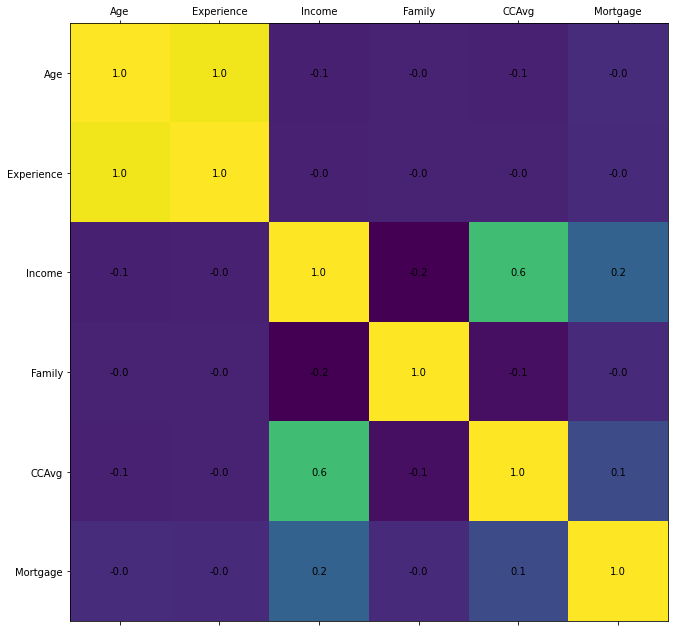

In [32]:
plot_corr(df)

In [33]:
#Age & Exp are highly correlated. Hence we can remove Experience.
df= df.drop('Experience', axis =1)
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,Undergrad,0,0,1,0,0,0
1,45,34,3,1.5,Undergrad,0,0,1,0,0,0
2,39,11,1,1.0,Undergrad,0,0,0,0,0,0
3,35,100,1,2.7,Graduate,0,0,0,0,0,0
4,35,45,4,1.0,Graduate,0,0,0,0,0,1


In [34]:
#All other variables are not so correlated.

In [35]:
df.groupby(['CD Account', 'CreditCard', 'Securities Account','Online'])['Personal Loan'].value_counts()

CD Account  CreditCard  Securities Account  Online  Personal Loan
0           0           0                   0       0                1168
                                                    1                 116
                                            1       0                1689
                                                    1                 165
                        1                   0       0                 132
                                                    1                   9
                                            1       0                 189
            1           0                   0       0                 477
                                                    1                  50
                                            1       0                 658
                        1                   0       0                  45
1           0           0                   1       1                  13
                        1                   0 

In [36]:
#Customers with larger family size (3 or more) are more probable to buy Personal Loans
pd.crosstab(df['Personal Loan'],df['Family'])

Family,1,2,3,4
Personal Loan,,,,
0,1365,1190,877,1088
1,107,106,133,134


In [37]:
#Customers with Advanced & Graduate Degrees are more probable to buy Personal Loans
pd.crosstab(df['Personal Loan'],df['Education'])

Education,Advanced/Professional,Graduate,Undergrad
Personal Loan,,,
0,1296,1221,2003
1,205,182,93


In [38]:
#Customers who do not have any securities are more probable to buy Personal Loans
pd.crosstab(df['Personal Loan'],df['Securities Account'])

Securities Account,0,1
Personal Loan,,
0,4058,462
1,420,60


In [39]:
#Target customers: CD Account
pd.crosstab(df['Personal Loan'],df['CD Account'])

CD Account,0,1
Personal Loan,,
0,4358,162
1,340,140


In [40]:
#Customers who are into internet banking are more probable to buy personal loans
pd.crosstab(df['Personal Loan'],df['Online'])

Online,0,1
Personal Loan,,
0,1827,2693
1,189,291


In [41]:
#Customers who do not have credit card with Thera Bank are more probable to buy personal loans
pd.crosstab(df['Personal Loan'],df['CreditCard'])

CreditCard,0,1
Personal Loan,,
0,3193,1327
1,337,143


In [42]:
#Customers with Advanced Degrees, high income and major credit card spending are most suitable to target.
df.groupby(["Personal Loan"]).mean()

,Age,Income,Family,CCAvg,Mortgage
Personal Loan,,,,,
0,45.367257,66.237389,2.373451,1.729009,51.789381
1,45.066667,144.745833,2.612500,3.905354,100.845833


In [43]:
prop_Y = df['Personal Loan'].value_counts(normalize=True)
print(prop_Y)
#The data is highly imbalanced.

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


In [44]:
#np.log(df[df['Mortgage']>0]['Mortgage']).hist()

In [45]:
#Dropping Mortgage column as it is highly skewed. 
df= df.drop('Mortgage', axis =1)
df.head()

,Age,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,Undergrad,0,1,0,0,0
1,45,34,3,1.5,Undergrad,0,1,0,0,0
2,39,11,1,1.0,Undergrad,0,0,0,0,0
3,35,100,1,2.7,Graduate,0,0,0,0,0
4,35,45,4,1.0,Graduate,0,0,0,0,1


In [46]:
df = pd.get_dummies(df, columns=['Education'])
df.head()

,Age,Income,Family,CCAvg,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate,Education_Undergrad
0,25,49,4,1.6,0,1,0,0,0,0,0,1
1,45,34,3,1.5,0,1,0,0,0,0,0,1
2,39,11,1,1.0,0,0,0,0,0,0,0,1
3,35,100,1,2.7,0,0,0,0,0,0,1,0
4,35,45,4,1.0,0,0,0,0,1,0,1,0


## Logistics Regression

Here we have classified the dataset into two subsets - Liability & Non-Liability Customers. 
We shall run Logistics Regression separately for both of them.

## Logistics Regression - Liability Customers

In [47]:
df_LB= df[df['CD Account'] == 1]
df_LB.head()
df_LB.shape

,Age,Income,Family,CCAvg,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate,Education_Undergrad
29,38,119,1,3.3,1,0,1,1,1,0,1,0
38,42,141,3,5.0,1,1,1,1,0,1,0,0
47,37,194,4,0.2,1,1,1,1,1,1,0,0
56,55,29,3,0.1,0,1,1,1,0,0,1,0
75,31,135,4,3.8,1,0,1,1,1,0,1,0


(302, 12)

3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [48]:
#Data Split- 5M
from sklearn.model_selection import train_test_split

X = df_LB.drop('Personal Loan',axis=1)     
Y = df_LB['Personal Loan']   

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

x_train.head()

#Checking split of data
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df_LB.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df_LB.index)) * 100))
print("")

#Checking Personal Loan True/False ratio in split data
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(df_LB.loc[df_LB['Personal Loan'] == 1]), (len(df_LB.loc[df_LB['Personal Loan'] == 1])/len(df_LB.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(df_LB.loc[df_LB['Personal Loan'] == 0]), (len(df_LB.loc[df_LB['Personal Loan'] == 0])/len(df_LB.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

,Age,Income,Family,CCAvg,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate,Education_Undergrad
2349,59,94,1,4.3,1,1,1,0,0,0,1
3327,42,164,1,1.3,1,1,1,1,1,0,0
4823,46,115,2,4.2,1,1,1,1,1,0,0
4501,59,38,3,2.2,1,1,1,1,1,0,0
322,63,101,1,3.9,1,1,1,0,0,0,1


69.87% data is in training set
30.13% data is in test set

Original Personal Loan True Values    : 140 (46.36%)
Original Personal Loan False Values   : 162 (53.64%)

Training Personal Loan True Values    : 101 (47.87%)
Training Personal Loan False Values   : 110 (52.13%)

Test Personal Loan True Values        : 39 (42.86%)
Test Personal Loan False Values       : 52 (57.14%)



4. Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance (15 marks)

In [49]:
#Modelling - 15M
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
y_predict = logreg.predict(x_test)
y_predict_train = logreg.predict(x_train)

In [51]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)

coef_df_LB = pd.DataFrame(model.coef_)
coef_df_LB['intercept'] = model.intercept_
coef_df_LB

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

,0,1,2,3,4,5,6,7,8,9,10,intercept
0,0.007744,0.043205,0.533996,0.010708,-0.749645,-1.111185,-1.356714,-2.561521,0.174526,0.151305,-1.437016,-1.111185


In [52]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.909952606635071

Testing accuracy 0.9120879120879121

Confusion Matrix


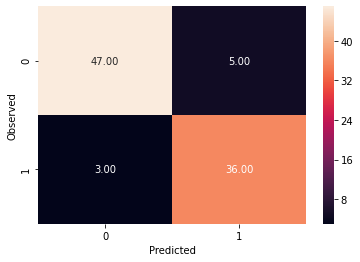

None

Recall: 0.9230769230769231

Precision: 0.8780487804878049

F1 Score: 0.9

Roc Auc Score Test: 0.9134615384615385

Roc Auc Score Train: 0.9095859585958596


In [53]:
print("Trainig accuracy",logreg.score(x_train,y_train))  
print()
print("Testing accuracy",logreg.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score Test:",roc_auc_score(y_test,y_predict))
print()
print("Roc Auc Score Train:",roc_auc_score(y_train,y_predict_train))

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

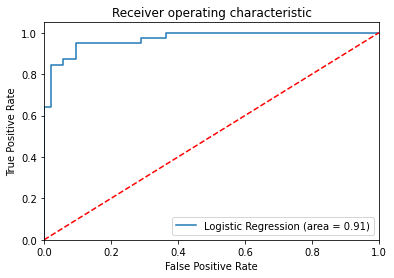

In [54]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

5. Give your reasoning on how can the model perform better? (10 marks) Hint: Check parameter

In [55]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [56]:
#Changing the value of Solver 
train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 1.0,solver=i)
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.91, 0.905, 0.91, 0.829, 0.82]

[0.857, 0.857, 0.912, 0.835, 0.835]


In [57]:
#Changing Penalty to l1
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 1.0,solver=i)
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

['liblinear', 'saga']

[0.924, 0.815]

[0.901, 0.835]


In [58]:
# changing class weight to balanced.
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') 

model.fit(x_train, y_train) 

y_predict = model.predict(x_test)     

print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Trainig accuracy 0.9289099526066351

Testing accuracy 0.9230769230769231


In [59]:
# Running a loop to check different values of 'C'. 

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight=None, C=i)
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(x_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.25, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.81, 0.867, 0.915, 0.924, 0.924, 0.924]

[0.813, 0.868, 0.879, 0.912, 0.923, 0.901]


LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Trainig accuracy 0.9289099526066351

Testing accuracy 0.9230769230769231

Confusion Matrix


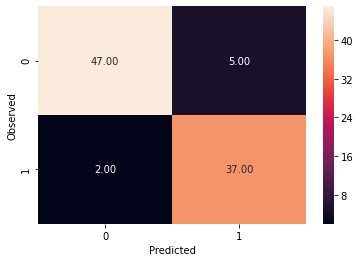

None

Recall: 0.9487179487179487

Precision: 0.8809523809523809

F1 Score: 0.9135802469135802

Roc Auc Score Test: 0.9262820512820512

Roc Auc Score Train: 0.9095859585958596


In [60]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l1', class_weight= 'balanced', solver='liblinear',C=1) 
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score Test:",roc_auc_score(y_test,y_predict))
print()
print("Roc Auc Score Train:",roc_auc_score(y_train,y_predict_train))

## Logistic Regression - Non Liability Customers

In [61]:
df_NLB= df[df['CD Account'] == 0]
df_NLB.head()
df_NLB.shape

,Age,Income,Family,CCAvg,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate,Education_Undergrad
0,25,49,4,1.6,0,1,0,0,0,0,0,1
1,45,34,3,1.5,0,1,0,0,0,0,0,1
2,39,11,1,1.0,0,0,0,0,0,0,0,1
3,35,100,1,2.7,0,0,0,0,0,0,1,0
4,35,45,4,1.0,0,0,0,0,1,0,1,0


(4698, 12)

3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [62]:
#Data Split- 5M
from sklearn.model_selection import train_test_split

X = df_NLB.drop('Personal Loan',axis=1)     
Y = df_NLB['Personal Loan']   

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

x_train.head()

#Checking split of data
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df_NLB.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df_NLB.index)) * 100))
print("")

#Checking Personal Loan True/False ratio in split data
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(df_NLB.loc[df_NLB['Personal Loan'] == 1]), (len(df_NLB.loc[df_NLB['Personal Loan'] == 1])/len(df_NLB.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(df_NLB.loc[df_NLB['Personal Loan'] == 0]), (len(df_NLB.loc[df_NLB['Personal Loan'] == 0])/len(df_NLB.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

,Age,Income,Family,CCAvg,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate,Education_Undergrad
3093,29,34,4,0.40,0,0,0,1,0,1,0
3816,55,70,3,2.00,0,0,1,1,0,1,0
1917,62,53,4,1.67,0,0,0,0,1,0,0
983,46,142,2,3.30,0,0,0,0,0,0,1
1054,63,8,4,0.60,0,0,1,0,0,1,0


69.99% data is in training set
30.01% data is in test set

Original Personal Loan True Values    : 340 (7.24%)
Original Personal Loan False Values   : 4358 (92.76%)

Training Personal Loan True Values    : 228 (6.93%)
Training Personal Loan False Values   : 3060 (93.07%)

Test Personal Loan True Values        : 112 (7.94%)
Test Personal Loan False Values       : 1298 (92.06%)



4. Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance (15 marks)

In [63]:
#Modelling - 15M
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
y_predict = logreg.predict(x_test)
y_predict_train = logreg.predict(x_train)

In [65]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df_NLB = pd.DataFrame(model.coef_)
coef_df_NLB['intercept'] = model.intercept_
coef_df_NLB

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

,0,1,2,3,4,5,6,7,8,9,10,intercept
0,-0.010146,0.050233,0.327651,0.140761,-1.310921,0.0,-0.644391,-0.857764,-0.745485,-0.792316,-4.380493,-5.918295


In [66]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9628953771289538

Testing accuracy 0.9659574468085106

Confusion Matrix


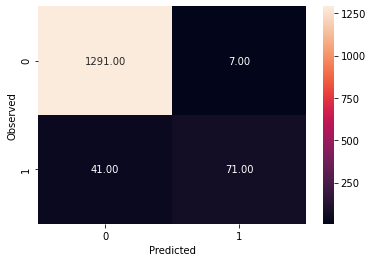

None

Recall: 0.6339285714285714

Precision: 0.9102564102564102

F1 Score: 0.7473684210526315

Roc Auc Score Test: 0.814267829627999

Roc Auc Score Train: 0.7669590643274854


In [67]:
print("Trainig accuracy",logreg.score(x_train,y_train))  
print()
print("Testing accuracy",logreg.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score Test:",roc_auc_score(y_test,y_predict))
print()
print("Roc Auc Score Train:",roc_auc_score(y_train,y_predict_train))

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

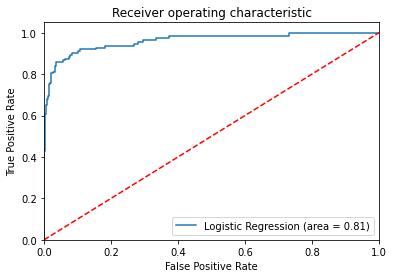

In [68]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

5. Give your reasoning on how can the model perform better? (10 marks) Hint: Check parameter

In [69]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [70]:
#Changing the value of Solver 
train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 1.0,solver=i)
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.964, 0.964, 0.963, 0.934, 0.929]

[0.965, 0.964, 0.966, 0.931, 0.926]


In [71]:
#Changing Penalty to l1
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 1.0,solver=i)
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

['liblinear', 'saga']

[0.965, 0.929]

[0.965, 0.926]


In [72]:
# changing class weight to balanced. However it's not increasing accuracy. Hence default: None is better.
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') 

model.fit(x_train, y_train) 

y_predict = model.predict(x_test)     

print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Trainig accuracy 0.8865571776155717

Testing accuracy 0.8872340425531915


In [73]:
# Running a loop to check different values of 'C'. For C=0.5, 0.75, 1.0 The accuracy remains same. Hence we can choose
#any value. 

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight=None, C=i)
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(x_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.25, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.927, 0.96, 0.964, 0.966, 0.965, 0.965]

[0.927, 0.962, 0.965, 0.965, 0.966, 0.965]


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Trainig accuracy 0.9628953771289538

Testing accuracy 0.9659574468085106

Confusion Matrix


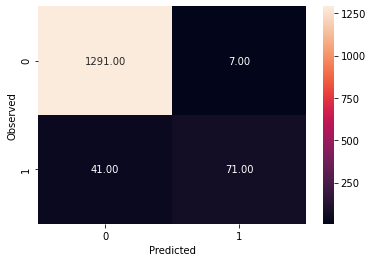

None

Recall: 0.6339285714285714

Precision: 0.9102564102564102

F1 Score: 0.7473684210526315

Roc Auc Score Test: 0.814267829627999

Roc Auc Score Train: 0.7669590643274854


In [77]:
#Therefore final model is
model = LogisticRegression(random_state=42, penalty='l2', solver='liblinear', C=1) 
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score Test:",roc_auc_score(y_test,y_predict))
print()
print("Roc Auc Score Train:",roc_auc_score(y_train,y_predict_train))

6. Give Business understanding of your model? (5 marks)

Here the bank wants to identify & target leads for a personal loan based on their Income, Age, Education, Family Size, Credit Card Spending etc. 
It then wants to convert these customers into buying personal loans. 
The success rate would be determined by how many leads who would buy the loan & leads which wouldn't buy the loan were correctly identified. 
The model is evaluated considering the area under the curve using ROC curve.

The model has been separately run for Liability & Non Liability Customers. Apart from liability customers bank may also additionally target few non-liability customers identified by the model as prospects.

1. Liability Customers:

ROC Value: 0.926

Confusion matrix means:

True Positive (observed=1,predicted=1):37
We correctly predicted that they will buy Personal loan

False Positive (observed=0,predicted=1): 5
We incorrectly predicted that they will buy Persoanal Loan (a "Type I error") Falsely predict positive Type I error

True Negative (observed=0,predicted=0): 47
We correctly predicted that they will not buy Personal Loan

False Negative (observed=1,predicted=0): 2
We incorrectly predicted that they will not buy Personal Loan (a "Type II error") Falsely predict negative Type II error

The bank can target customers with high income, Advanced Education & in older age group.
The bank should avoid targeting customers who have a securities account & are already using a credit card.


2. Non-Liability Customers

ROC Value: 0.814

Confusion matrix means:

True Positive (observed=1,predicted=1):71
We correctly predicted that they will buy Personal loan

False Positive (observed=0,predicted=1): 6
We incorrectly predicted that they will buy Persoanal Loan (a "Type I error") Falsely predict positive Type I error

True Negative (observed=0,predicted=0): 1292
We correctly predicted that they will not buy Personal Loan

False Negative (observed=1,predicted=0): 6
We incorrectly predicted that they will not buy Personal Loan (a "Type II error") Falsely predict negative Type II error

The bank can target customers with high income & in younger age group. 
The bank should avoid targeting customers who already have securities account & are already using a credit card.

Age is the differentiating factor in both the sub-groups.

After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict and target those customers who have been identified as high probability customers. They can use the model for upcoming customers.

In [ ]:
#Github Link
#https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-astha1992